# Contents

* [<font size=4>Getting Started</font>](#1)
    * [Importing the Libraries](#1.1)
    * [Importing and Inspecting the Data](#1.2)
   
   
* [<font size=4>Fitting the model</font>](#2)
    * [Setting up the input and the output variable](#2.1)
    * [Scaling Data](#2.2)
    * [Fitting the Model](#2.3)
    * [Model Evaluation](#2.4)
    * [Optimal value of K](#2.5)
    



# Getting Started <a id="1"></a>
Here we describe importing the library, impoting the datset and some basic checks on the dataset

# Importing the Libraries <a id="1.1"></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
print(os.listdir(".."))

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
1)ID number
2)Diagnosis (M = malignant, B = benign)
3-32)

# Importing and Inspecting the Data <a id="1.1"></a>

In [ ]:
mydata = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
print(mydata.shape)
print(mydata.head(2))
# Looking at the class
print(mydata.iloc[:,1].describe())
# Looking at first few variables
print(mydata.iloc[:,2:6].describe())

In [ ]:
mydata.boxplot(column=[ 'texture_mean','perimeter_mean'], by='diagnosis', grid=False)

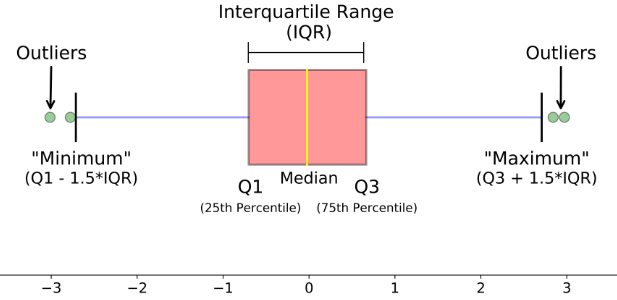

In [ ]:
# Dropping Columns
mydata=mydata.drop(['id', 'Unnamed: 32'], axis = 1) 
print(mydata.shape)

# Fitting the model <a id="2"></a>
In this section we first set up the input and output variable.   Build kNN with 15 neighbors.  Look at the classification metric.  A test on diffrent values of 'k' also has  been performed.

# Setting up the input and output variable <a id="2.1"></a>

In [ ]:
y = mydata.iloc[:,0]
x = mydata.iloc[:,1:31]

# Scaling the data <a id="2.2"></a>

* Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 
* It is performed during the data pre-processing to handle highly varying magnitudes or values or units
* Min-Max Normalization: This technique re-scales a feature or observation value with distribution value  0 and 1
* Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
* Min-Max is often preferred as it maintains the shape of the distribution

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)
x_scaled

Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Fitting the model <a id=2.3></a>

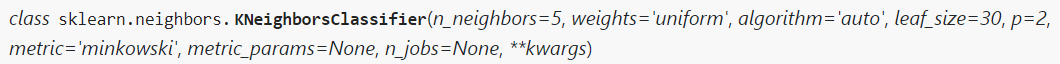

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Initalize the classifier
knn = KNeighborsClassifier(n_neighbors=100,weights='uniform')
#Fitting the training data
knn.fit(x_train, y_train)
#Predicting on test
y_pred=knn.predict(x_test)

# Model Evaluation <a id="2.4"></a>

In [ ]:
#Accuracy
print('Accuracy = ', knn.score(x_test, y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print('\nConfusion matrix')
print(confusion_matrix(y_test, y_pred))

#Classification Report
from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, y_pred))  

# Optimal value of K <a id="2.5"></a>

In [ ]:
nc=np.arange(10,1,-2)
nc

In [ ]:
nc=np.arange(1,100,2)
acc=np.empty(50)
i=0
for k in np.nditer(nc):
    knn = KNeighborsClassifier(n_neighbors=int(k),weights='uniform')
    knn.fit(x_train, y_train)
    temp= knn.score(x_test, y_test)
    print(temp)
    acc[i]=temp
    i = i + 1
acc

**Plotting the accuracy with number of neighborhoods**

In [ ]:
x=pd.Series(acc,index=nc)
x.plot()
# Add title and axis names
plt.title('Neighbor vs Accuracy')
plt.xlabel('Count of Neighbor')
plt.ylabel('Accuracy')
plt.show() 


# Assignment
* Report classification accuracy with k value of 100
* Change the weight parameter to distance and report the result with k =15